In [1]:
import pandas as pd

In [131]:
df = pd.read_excel('IBM_Job_satisfaction.xlsm')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       19478 non-null  int64 
 1   BusinessTravel            19478 non-null  object
 2   DailyRate                 19478 non-null  int64 
 3   Department                19478 non-null  object
 4   DistanceFromHome          19478 non-null  int64 
 5   Education                 19478 non-null  int64 
 6   EnvironmentSatisfaction   19478 non-null  int64 
 7   Gender                    19478 non-null  object
 8   HourlyRate                19478 non-null  int64 
 9   JobInvolvement            19478 non-null  int64 
 10  JobLevel                  19478 non-null  int64 
 11  JobRole                   19478 non-null  object
 12  JobSatisfaction           19478 non-null  int64 
 13  MaritalStatus             19478 non-null  object
 14  MonthlyIncome         

In [133]:
df = df[['Age', 'Department', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'WorkLifeBalance','JobSatisfaction']]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              19478 non-null  int64 
 1   Department       19478 non-null  object
 2   Education        19478 non-null  int64 
 3   Gender           19478 non-null  object
 4   JobLevel         19478 non-null  int64 
 5   MonthlyIncome    19478 non-null  int64 
 6   WorkLifeBalance  19478 non-null  int64 
 7   JobSatisfaction  19478 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


Non-numerical attrbitues

In [135]:
df['Department'].unique()[[1, 0, 2]]

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [136]:
dept_dict = {d:i for i,d in enumerate(df['Department'].unique()[[1, 0, 2]])}
dept_dict_inv = {i:d for d,i in dept_dict.items()}
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [137]:
gender_dict = {g:i for i,g in enumerate(df['Gender'].unique()[[1,0]])}
gender_dict_inv = {i:g for g,i in dept_dict.items()}
gender_dict

{'Female': 0, 'Male': 1}

In [138]:
df['Department'] = df['Department'].map(dept_dict)
df['Gender'] = df['Gender'].map(gender_dict)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [140]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,37.524489,1.246021,2.924274,0.597854,2.104990,6665.078961,2.769689,2.752849
std,8.860420,0.518838,1.026008,0.490344,1.115506,4781.062495,0.700480,1.097875
min,18.000000,0.000000,1.000000,0.000000,1.000000,1009.000000,1.000000,1.000000
25%,31.000000,1.000000,2.000000,0.000000,1.000000,3038.000000,2.000000,2.000000
50%,36.000000,1.000000,3.000000,1.000000,2.000000,5042.000000,3.000000,3.000000
75%,43.000000,2.000000,4.000000,1.000000,3.000000,8620.000000,3.000000,4.000000
max,60.000000,2.000000,5.000000,1.000000,5.000000,19999.000000,4.000000,4.000000


<AxesSubplot:>

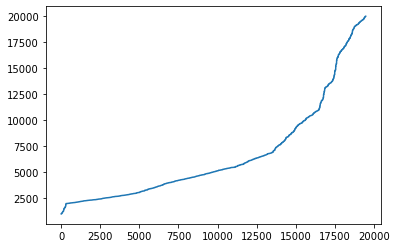

In [141]:
df['MonthlyIncome'].sort_values().plot(use_index=False)

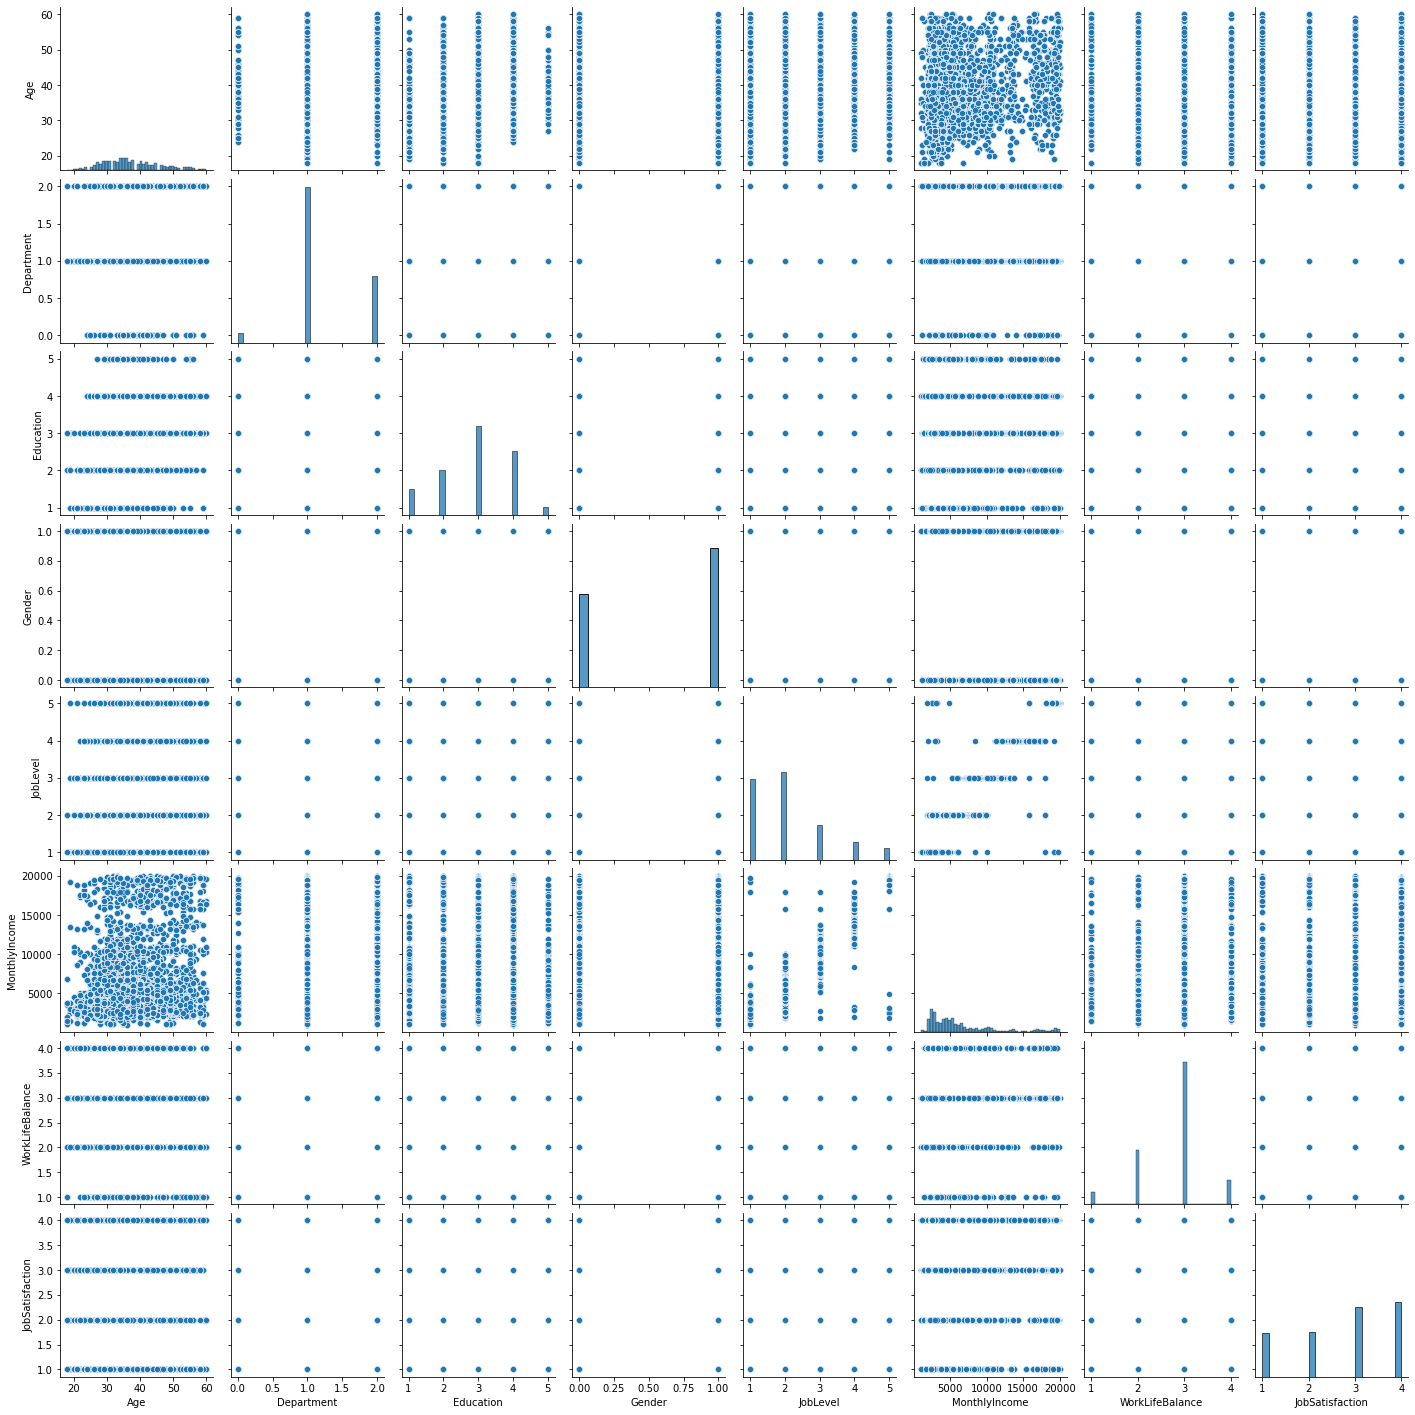

In [142]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

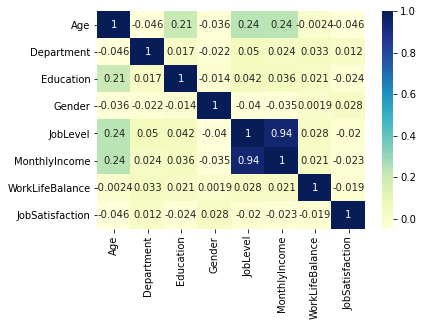

In [143]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

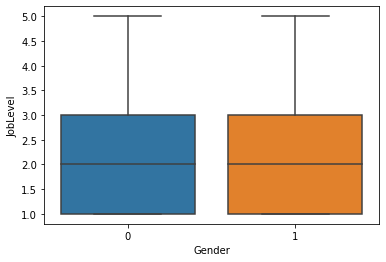

In [144]:
sns.boxplot(x='Gender', y='JobLevel', data = df)

Discretization

In [145]:
df['Age'].min(), df['Age'].max()

(18, 60)

In [146]:
q1, q2 = df['Age'].quantile([0.3333,0.6666]).astype(int).values
q1, q2

(33, 41)

In [147]:
import numpy as np

In [148]:
(df['Age']<=q1).sum(), (np.logical_and(df['Age']>q1,df['Age']<=q2)).sum(), (df['Age']>q2).sum()

(6856, 6655, 5967)

In [149]:
def f(age):
    if age<=q1:
        return f'18-{q1}'
    elif age>q1 and age<=q2:
        return f'{q1}-{q2}'
    elif age>q2:
        return f'{q2}-60'
    
df['Age'] = df['Age'].map(f)

In [150]:
df['Age']

0        41-60
1        41-60
2        41-60
3        41-60
4        41-60
         ...  
19473    41-60
19474    33-41
19475    33-41
19476    41-60
19477    18-33
Name: Age, Length: 19478, dtype: object

In [151]:
age_dict = {a:i for i,a in enumerate(sorted(df['Age'].unique()))}
age_dict_inv = {i:a for a,i in age_dict.items()}
age_dict

{'18-33': 0, '33-41': 1, '41-60': 2}

In [152]:
df['Age'] = df['Age'].map(age_dict)

In [153]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1009, 19999)

In [154]:
q1, q2 = df['MonthlyIncome'].quantile([0.3333,0.6666]).astype(int).values
q1, q2

(3812, 6632)

In [155]:
def f(income):
    if income<=q1:
        return f'1009-{q1}'
    elif income>q1 and income<=q2:
        return f'{q1}-{q2}'
    elif income>q2:
        return f'{q2}-19999'
    
df['MonthlyIncome'] = df['MonthlyIncome'].map(f)

In [156]:
df['MonthlyIncome']

0         3812-6632
1         3812-6632
2         3812-6632
3         3812-6632
4         3812-6632
            ...    
19473     1009-3812
19474     3812-6632
19475     1009-3812
19476    6632-19999
19477     1009-3812
Name: MonthlyIncome, Length: 19478, dtype: object

In [157]:
income_dict = {inc:i for i,inc in enumerate(sorted(df['MonthlyIncome'].unique(), key=lambda inc: int(inc.split('-')[0])))}
income_dict_inv = {inc:a for a,inc in income_dict.items()}
income_dict

{'1009-3812': 0, '3812-6632': 1, '6632-19999': 2}

In [158]:
df['MonthlyIncome'] = df['MonthlyIncome'].map(income_dict)

In [159]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.954359,1.246021,2.924274,0.597854,2.104990,0.999179,2.769689,2.752849
std,0.810113,0.518838,1.026008,0.490344,1.115506,0.816412,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,4.000000,1.000000,3.000000,2.000000,3.000000,4.000000
max,2.000000,2.000000,5.000000,1.000000,5.000000,2.000000,4.000000,4.000000


Further discretization

In [160]:
(df['Education']<=2).sum(), (df['Education']==3).sum(), (df['Education']>3).sum()

(5975, 7479, 6024)

In [161]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e==3:
        return 1
    else: 
        return 2

df['Education'] = df['Education'].map(f)

In [162]:
(df['JobLevel']==1).sum(), np.logical_and(df['JobLevel']>1,df['JobLevel']<=3).sum(), (df['JobLevel']>3).sum()

(6766, 10257, 2455)

In [163]:
(df['JobLevel']==1).sum(), (df['JobLevel']==2).sum(), (df['JobLevel']>2).sum()

(6766, 7347, 5365)

In [164]:
def f(e):
    if e==1:
        return 0
    elif e==2:
        return 1
    else: 
        return 2

df['JobLevel'] = df['JobLevel'].map(f)

In [165]:
(df['WorkLifeBalance']==1).sum(), (df['WorkLifeBalance']==2).sum(), (df['WorkLifeBalance']>2).sum()

(1006, 4520, 13952)

In [166]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(f)

In [167]:
(df['JobSatisfaction']==1).sum(), (df['JobSatisfaction']==2).sum(), (df['JobSatisfaction']>2).sum()

(3676, 3712, 12090)

In [168]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['JobSatisfaction'] = df['JobSatisfaction'].map(f)

In [169]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.954359,1.246021,1.002516,0.597854,0.928073,0.999179,0.716295,0.620700
std,0.810113,0.518838,0.784891,0.490344,0.785916,0.816412,0.450807,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


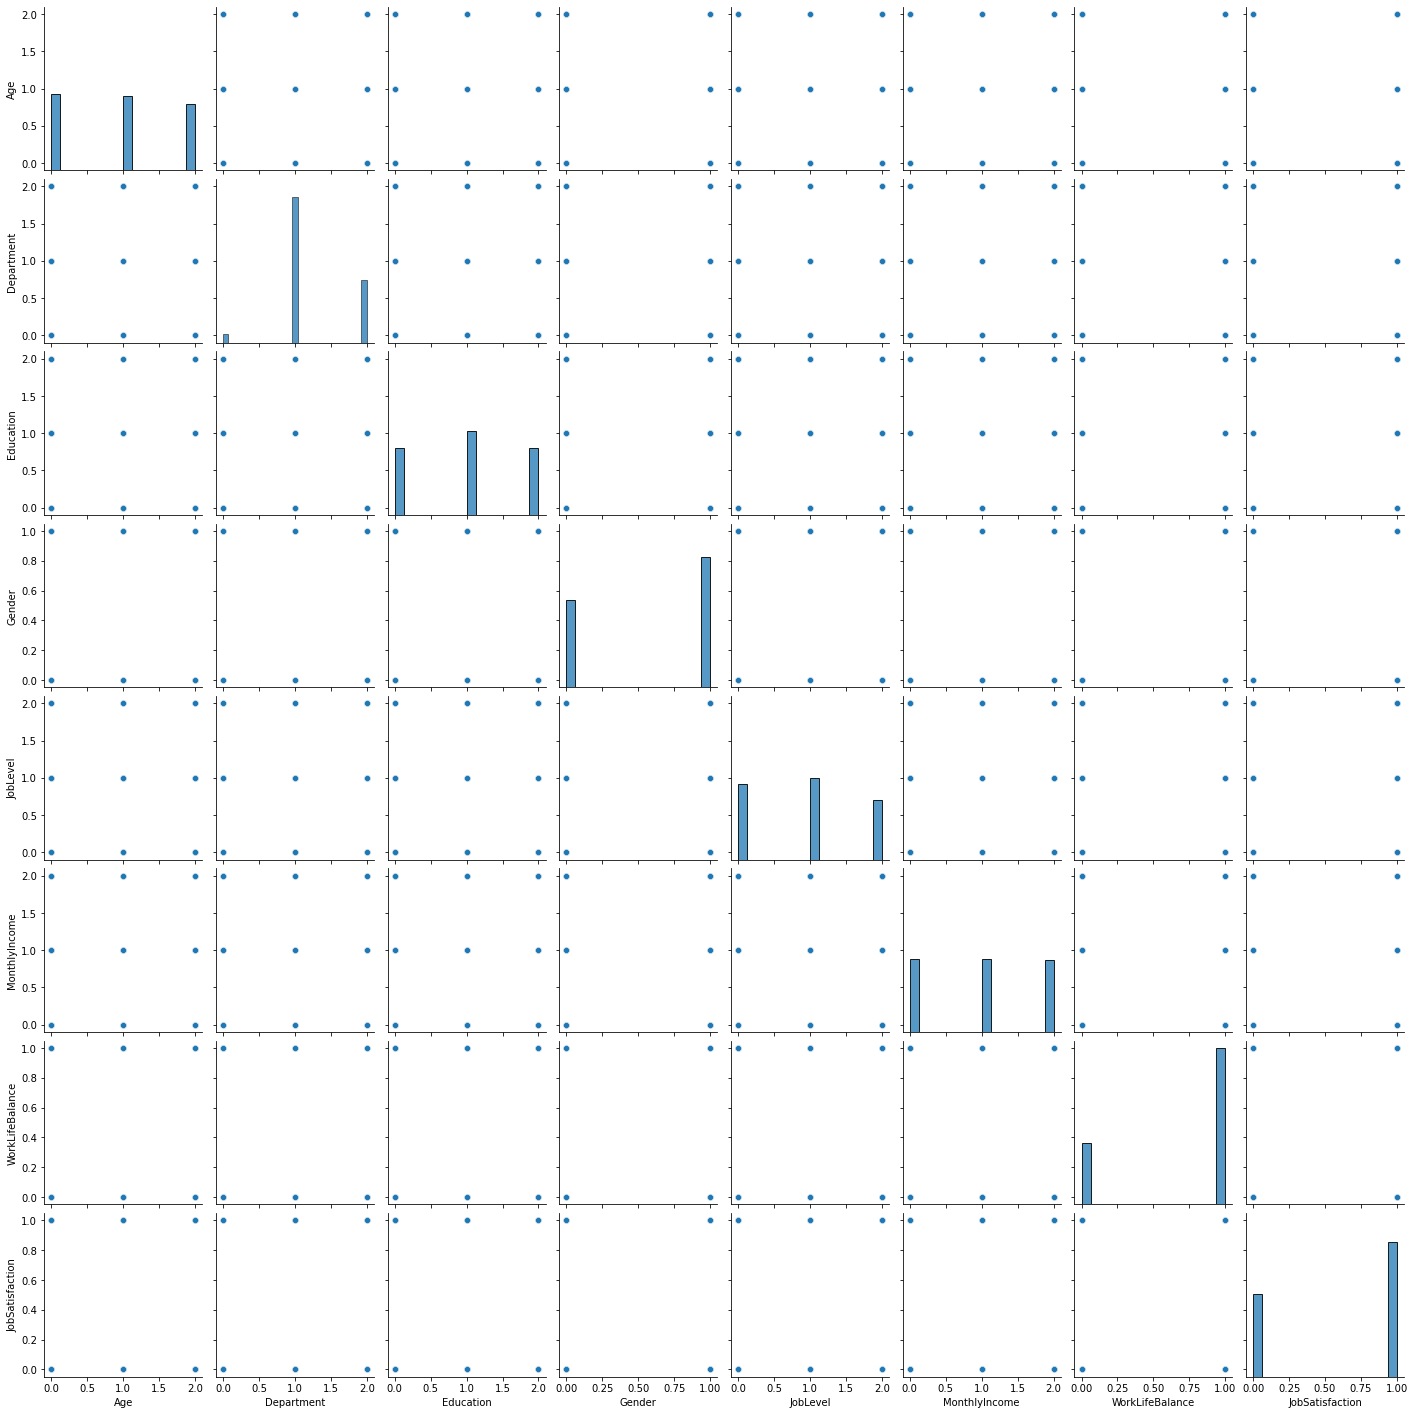

In [170]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

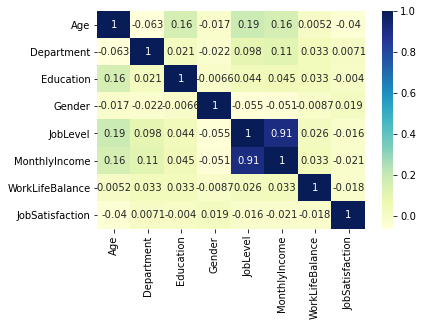

In [171]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

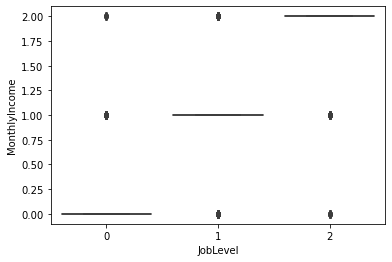

In [172]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data = df)

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

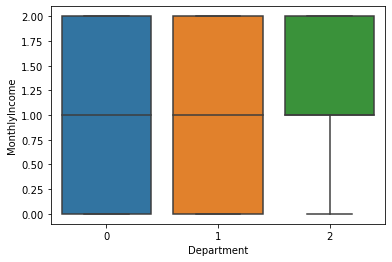

In [173]:
sns.boxplot(x='Department', y='MonthlyIncome', data = df)

<AxesSubplot:xlabel='Age', ylabel='JobLevel'>

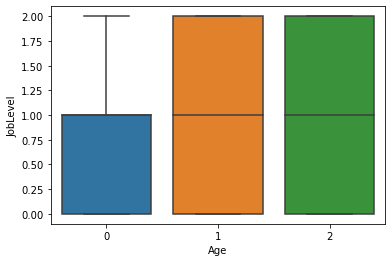

In [174]:
sns.boxplot(x='Age', y='JobLevel', data = df)

## Adding bias

In [175]:
import random

def add_bias(data, evidence, variable, positive=True, amount=0.2):
    data = data.copy()
    evidence_support = sorted(data[evidence].unique())
    if not positive:
        evidence_support = evidence_support[::-1]
    #print(evidence_support)
    max_variable_value = df[variable].max()
    min_variable_value = df[variable].min()
    neg_amount = amount
    pos_amount = 0.0
    step_amount = amount/(len(evidence_support)-1)
    def f(variable_value):
        if random.uniform(0,1)<=neg_amount and variable_value>min_variable_value:
            return variable_value-1
        elif random.uniform(0,1)<=pos_amount and variable_value<max_variable_value:
            return variable_value+1
        else:
            return variable_value
    for evidence_value in evidence_support:
        print(neg_amount, pos_amount)
        data.loc[df[evidence]>=evidence_value, variable] = data[variable][df[evidence]>=evidence_value].map(f)
        neg_amount -= step_amount
        pos_amount += step_amount
    
    return data

In [176]:
df_temp = df.copy()

Age - JobLevel

In [50]:
df_new = add_bias(data=df_temp, evidence='Age', variable='JobLevel', amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

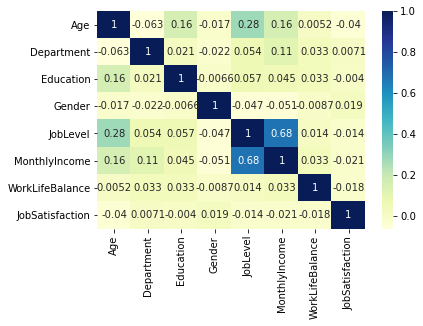

In [51]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

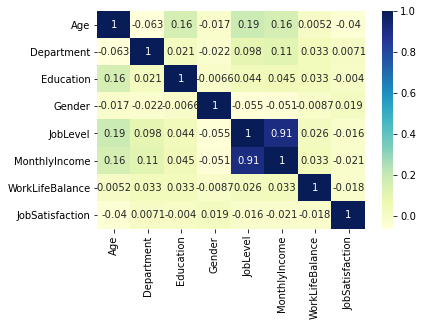

In [177]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [481]:
df_temp = df_new

Gender - JobLevel

In [183]:
df_new = add_bias(data=df_temp, evidence='Gender', variable='JobLevel', amount=0.45)

0.45 0.0
0.0 0.45


<AxesSubplot:>

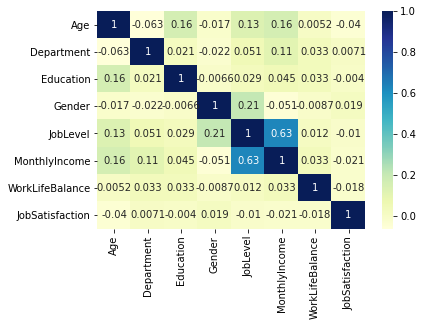

In [184]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

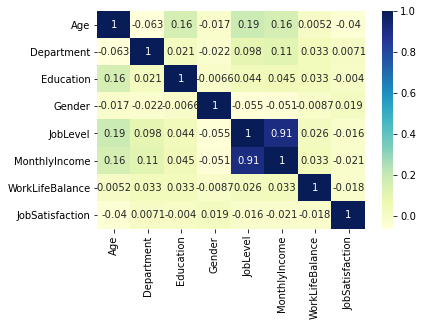

In [185]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [186]:
df_temp = df_new

Education - JobLevel

In [189]:
df_new = add_bias(data=df_temp, evidence='Education', variable='JobLevel', amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

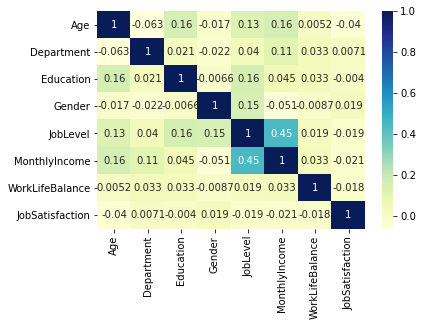

In [190]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

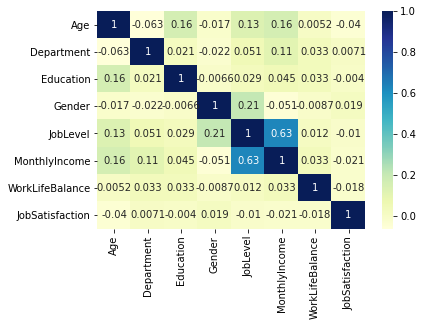

In [191]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [192]:
df_temp = df_new

JobLevel - WorkLifeBalance

In [193]:
df_new = add_bias(data=df_temp, evidence='JobLevel', variable='WorkLifeBalance', positive=False, amount=0.4)

0.4 0.0
0.2 0.2
0.0 0.4


<AxesSubplot:>

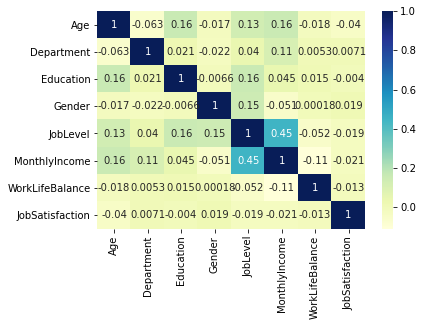

In [194]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

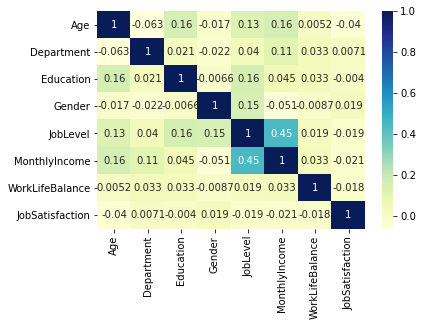

In [195]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [196]:
df_temp = df_new

Department - MonthlyIncome

SKIP

In [511]:
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [197]:
df_new = add_bias(data=df_temp, evidence='Department', variable='MonthlyIncome', positive=True, amount=0.2)

0.2 0.0
0.1 0.1
0.0 0.2


<AxesSubplot:>

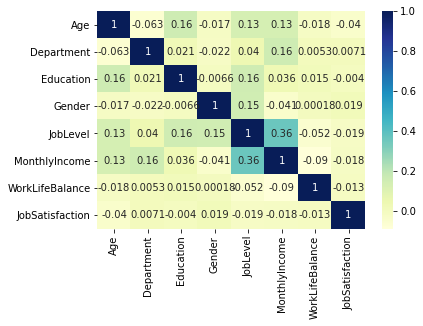

In [198]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

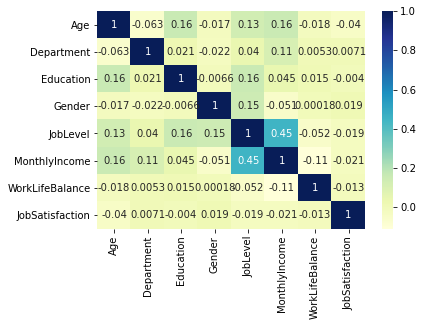

In [199]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [515]:
df_temp = df_new

Department - WorkLifeBalance

In [200]:
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [201]:
df_new = add_bias(data=df_temp, evidence='Department', variable='WorkLifeBalance', positive=False, amount=0.4)

0.4 0.0
0.2 0.2
0.0 0.4


<AxesSubplot:>

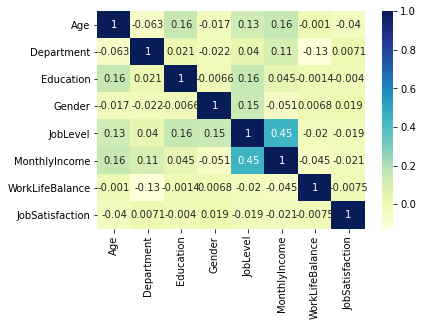

In [202]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

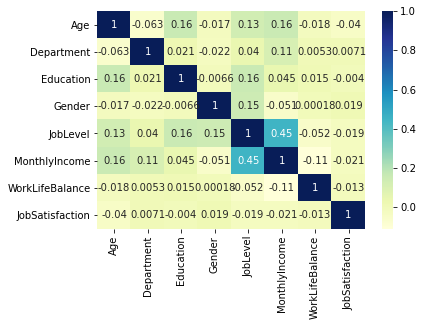

In [203]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [204]:
df_temp = df_new

MonthlyIncome - JobSatisfaction

In [205]:
df_temp.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.954359,1.246021,1.002516,0.597854,0.779649,0.999179,0.770870,0.620700
std,0.810113,0.518838,0.784891,0.490344,0.770211,0.816412,0.420284,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


In [208]:
df_new = add_bias(data=df_temp, evidence='MonthlyIncome', variable='JobSatisfaction', positive=True, amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

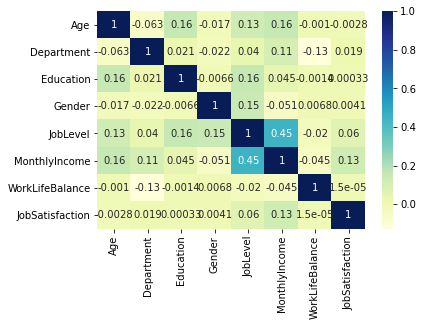

In [209]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

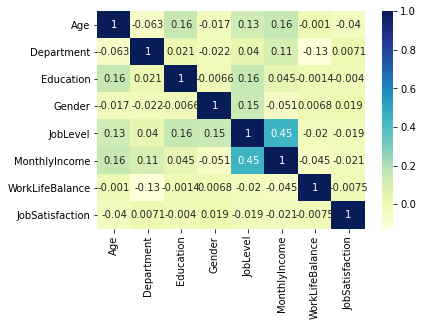

In [210]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [211]:
df_temp = df_new

JobLevel - JobSatisfaction

In [217]:
df_new = add_bias(data=df_new, evidence='JobLevel', variable='JobSatisfaction', positive=True, amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

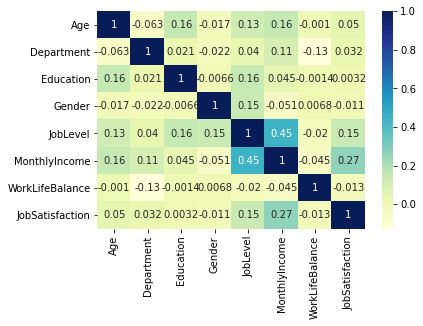

In [218]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

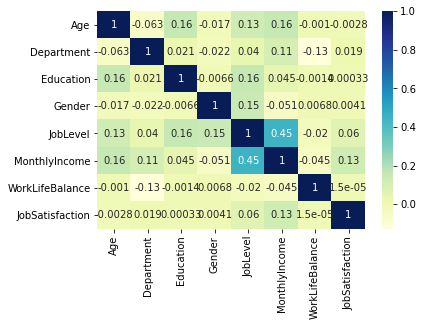

In [219]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [220]:
df_temp = df_new

WorkLifeBalance - JobSatisfaction

In [226]:
df_new = add_bias(data=df_temp, evidence='WorkLifeBalance', variable='JobSatisfaction', positive=True, amount=0.40)

0.4 0.0
0.0 0.4


<AxesSubplot:>

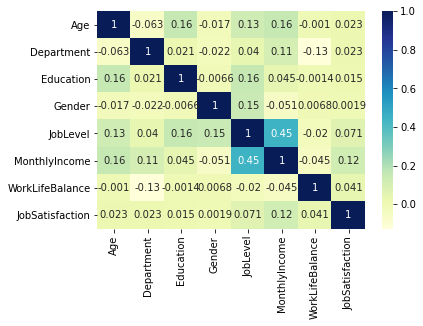

In [227]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

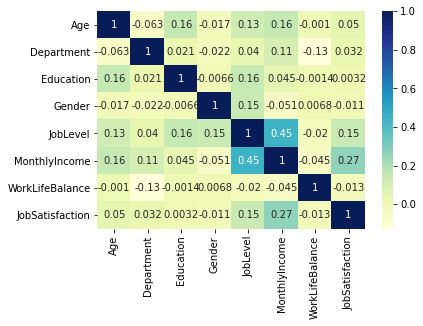

In [223]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [228]:
df_temp = df_new

In [229]:
df = df_temp

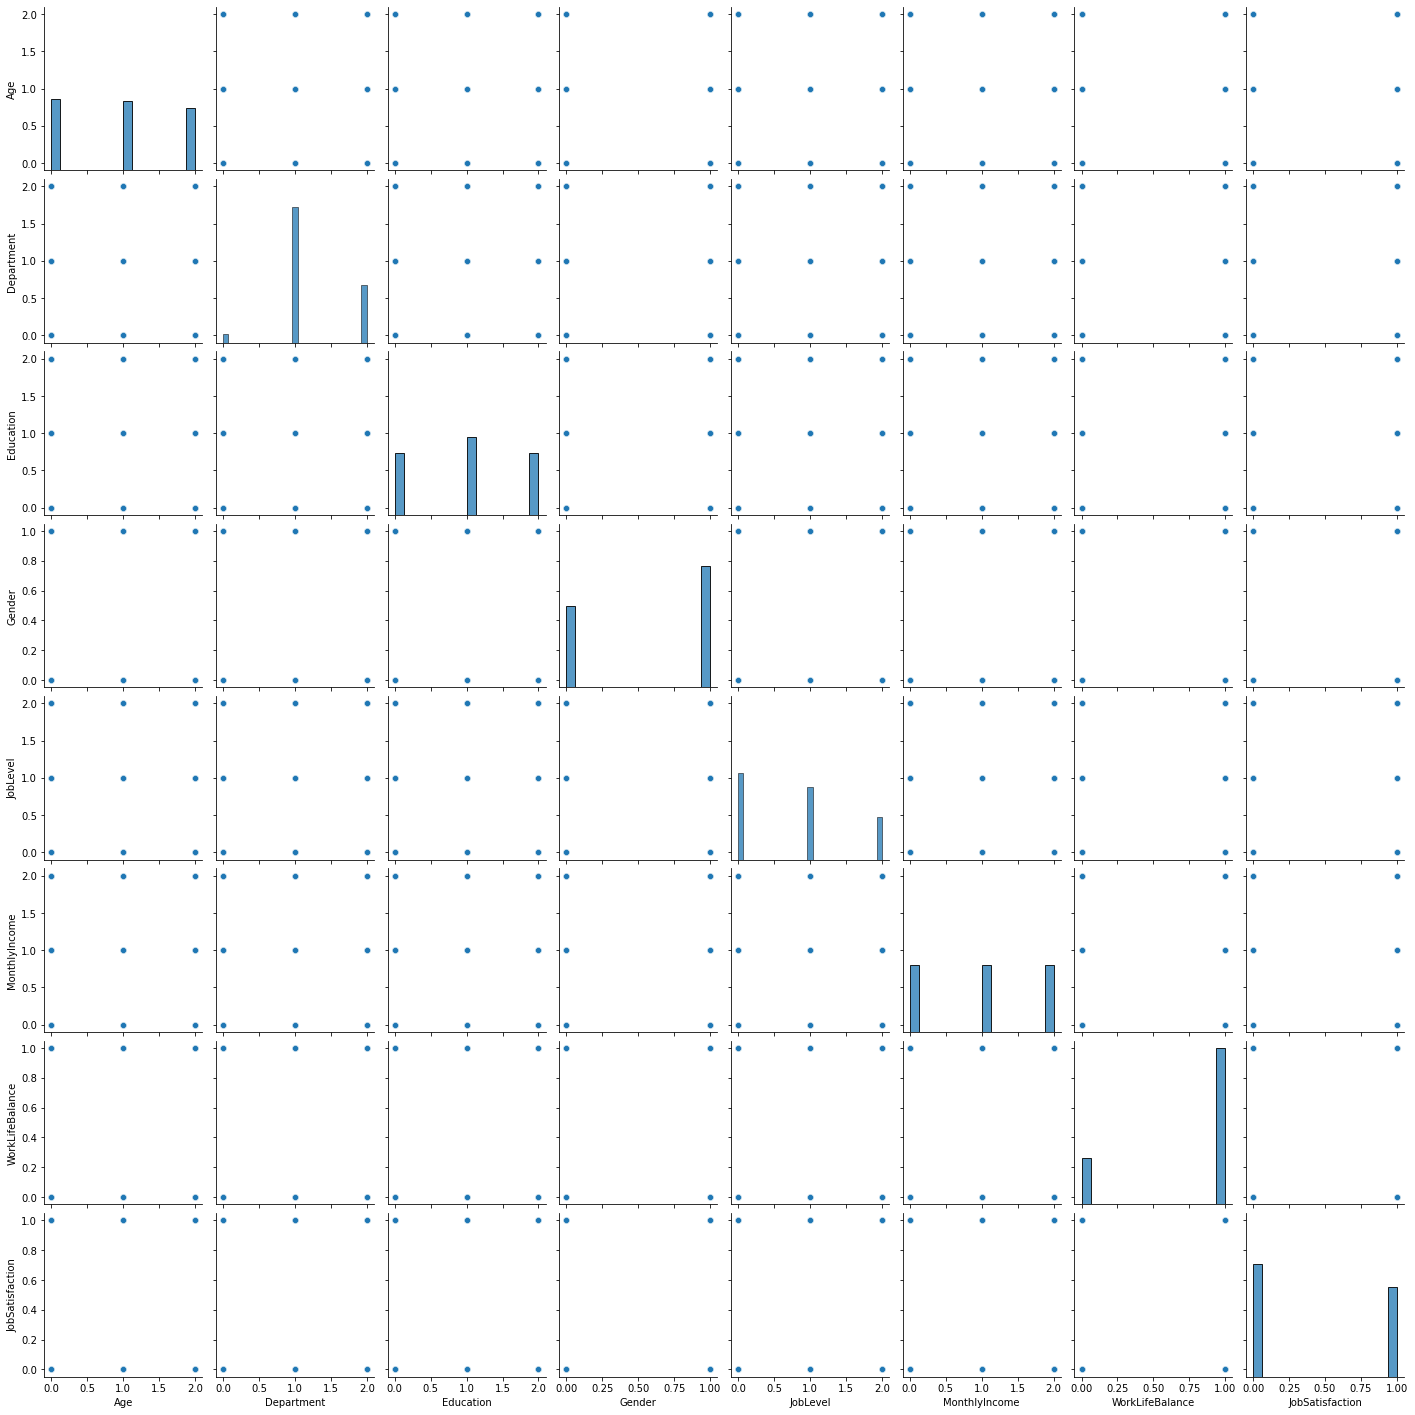

In [299]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='JobSatisfaction'>

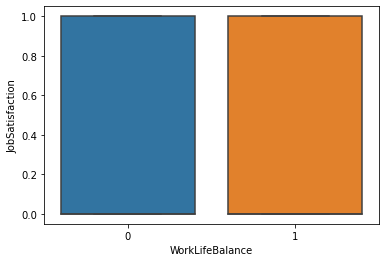

In [301]:
sns.boxplot(x='WorkLifeBalance', y='JobSatisfaction', data = df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobSatisfaction'>

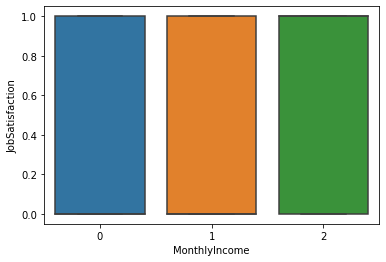

In [302]:
sns.boxplot(x='MonthlyIncome', y='JobSatisfaction', data = df)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

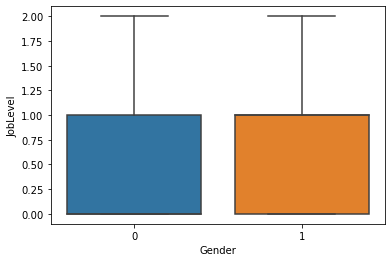

In [304]:
sns.boxplot(x='Gender', y='JobLevel', data = df)

<AxesSubplot:xlabel='Education', ylabel='JobLevel'>

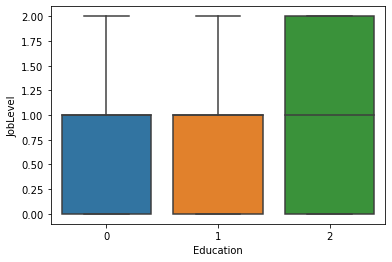

In [305]:
sns.boxplot(x='Education', y='JobLevel', data = df)

<AxesSubplot:xlabel='JobLevel', ylabel='WorkLifeBalance'>

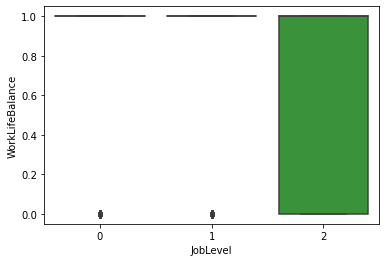

In [306]:
sns.boxplot(x='JobLevel', y='WorkLifeBalance', data = df)

In [ ]:
sns.boxplot(x='JobLevel', y='WorkLifeBalance', data = df)

In [392]:
import numpy as np
import itertools

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {variable_value:cpd[variable_value].mean() for variable_value in variable_support}
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [390]:
compute_cpd(data=df, variable='Age')

Age,0,1,2
Evidences,,,
,0.314765,0.516223,0.169011


In [193]:
(df['Age']==0).sum()/df.shape[0]

0.3147653763220043

In [194]:
(df['Age']==1).sum()/df.shape[0]

0.5162234315638156

In [195]:
(df['Age']==2).sum()/df.shape[0]

0.16901119211418011

In [393]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.598561,0.329868,0.071571
Age==0 Education==1,0.507074,0.366440,0.126486
Age==0 Education==2,0.354167,0.489583,0.156250
Age==1 Education==0,0.496901,0.355450,0.147649
Age==1 Education==1,0.390421,0.401306,0.208273
Age==1 Education==2,0.293839,0.398104,0.308057
Age==2 Education==0,0.396717,0.400821,0.202462
Age==2 Education==1,0.281913,0.395010,0.323077
Age==2 Education==2,0.179487,0.346154,0.474359


In [197]:
df['Age'].unique(), df['Education'].unique()

(array([2, 1, 0], dtype=int64), array([0, 1, 2], dtype=int64))

In [394]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.5985605757696921

In [395]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==1].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.3298680527788884

In [396]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.07157137145141944

In [397]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.3541666666666667

In [398]:
(df['Age'][df['Age']==0][df['Education']==1][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==1].count())

0.5070741369552915

In [399]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.15625

In [400]:
(df['Age'][df['Age']==2][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==2][df['Education']==2].count())

0.47435897435897434

In [401]:
import itertools
list(itertools.product([1,2,3],[3,4,5],['a','b']))

[(1, 3, 'a'),
 (1, 3, 'b'),
 (1, 4, 'a'),
 (1, 4, 'b'),
 (1, 5, 'a'),
 (1, 5, 'b'),
 (2, 3, 'a'),
 (2, 3, 'b'),
 (2, 4, 'a'),
 (2, 4, 'b'),
 (2, 5, 'a'),
 (2, 5, 'b'),
 (3, 3, 'a'),
 (3, 3, 'b'),
 (3, 4, 'a'),
 (3, 4, 'b'),
 (3, 5, 'a'),
 (3, 5, 'b')]

In [143]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df_t = df.copy()

df_t['Education'] = df['Education'].map(f)

In [144]:
df_t['JobLevel'] = df['JobLevel'].map(f)

In [153]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
Row 0
	Age==0
	Education==0
2007
[0.8086696562032885, 0.16741405082212257, 0.02391629297458894]
Row 1
	Age==0
	Education==1
2490
[0.8485943775100402, 0.12008032128514057, 0.03132530120481928]
Row 2
	Age==0
	Education==2
48
[1.0, 0.0, 0.0]
Row 3
	Age==1
	Education==0
2357
[0.7878659312685617, 0.171828595672465, 0.04030547305897327]
Row 4
	Age==1
	Education==1
5757
[0.7476116032655897, 0.22546465172833072, 0.026923745006079556]
Row 5
	Age==1
	Education==2
312
[0.5993589743589743, 0.375, 0.02564102564102564]
Row 6
	Age==2
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 7
	Age==2
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 8
	Age==2
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 9
	Age==3
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 10
	A

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.808670,0.167414,0.023916
Age==0 Education==1,0.848594,0.120080,0.031325
Age==0 Education==2,1.000000,0.000000,0.000000
Age==1 Education==0,0.787866,0.171829,0.040305
Age==1 Education==1,0.747612,0.225465,0.026924
Age==1 Education==2,0.599359,0.375000,0.025641
Age==2 Education==0,0.613389,0.273640,0.112971
Age==2 Education==1,0.653599,0.259319,0.087082
Age==2 Education==2,0.690476,0.277778,0.031746


In [158]:
def f(e):
    if e>=0 and e<=1:
        return 0
    elif e>=2 and e<3:
        return 1
    else: 
        return 2

df_t['Age'] = df['Age'].map(f)

In [159]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Row 0
	Age==0
	Education==0
4364
[0.7974335472043996, 0.16979835013748854, 0.03276810265811182]
Row 1
	Age==0
	Education==1
8247
[0.7781011276827937, 0.19364617436643627, 0.028252697950769977]
Row 2
	Age==0
	Education==2
360
[0.6527777777777778, 0.325, 0.022222222222222223]
Row 3
	Age==1
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 4
	Age==1
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 5
	Age==1
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 6
	Age==2
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 7
	Age==2
	Education==1
1470
[0.5170068027210885, 0.37210884353741497, 0.1108843537414966]
Row 8
	Age==2
	Education==2
62
[0.3870967741935484, 0.5, 0.11290322580645161]


JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [160]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,1.200739,0.617569,2.924274,0.402146,2.104990,0.802495,2.769689,2.752849
std,0.909498,0.901080,1.026008,0.490344,1.115506,0.974312,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,4.000000
max,3.000000,2.000000,5.000000,1.000000,5.000000,3.000000,4.000000,4.000000


In [210]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [212]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education']).values.T

array([[0.79743355, 0.77810113, 0.65277778, 0.61338912, 0.65359897,
        0.69047619, 0.61538462, 0.5170068 , 0.38709677],
       [0.16979835, 0.19364617, 0.325     , 0.27364017, 0.25931877,
        0.27777778, 0.32932692, 0.37210884, 0.5       ],
       [0.0327681 , 0.0282527 , 0.02222222, 0.11297071, 0.08708226,
        0.03174603, 0.05528846, 0.11088435, 0.11290323]])

In [402]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0 Gender==0,0.791802,0.173679,0.034520
Age==0 Education==0 Gender==1,0.484752,0.421855,0.093393
Age==0 Education==1 Gender==0,0.649965,0.292971,0.057063
Age==0 Education==1 Gender==1,0.409156,0.416786,0.174058
Age==0 Education==2 Gender==0,0.500000,0.416667,0.083333
Age==0 Education==2 Gender==1,0.305556,0.513889,0.180556
Age==1 Education==0 Gender==0,0.669124,0.260829,0.070046
Age==1 Education==0 Gender==1,0.384198,0.417370,0.198432
Age==1 Education==1 Gender==0,0.496992,0.375564,0.127444


In [222]:
df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0][df['JobLevel']==2].count()/df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0].count()

0.020330368487928845

In [224]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender']).iloc[0].sum()

0.9999999999999999

In [226]:
compute_cpd(data=df, variable='MonthlyIncome', evidences=['JobLevel','Department'])

MonthlyIncome,0,1,2
Evidences,,,
JobLevel==0 Department==0,0.968955,0.030211,0.000833
JobLevel==0 Department==1,0.967797,0.030508,0.001695
JobLevel==0 Department==2,0.934760,0.064475,0.000765
JobLevel==1 Department==0,0.042878,0.663154,0.293968
JobLevel==1 Department==1,0.000000,0.559441,0.440559
JobLevel==1 Department==2,0.034483,0.743746,0.221771
JobLevel==2 Department==0,0.008511,0.000000,0.991489
JobLevel==2 Department==1,0.024390,0.000000,0.975610
JobLevel==2 Department==2,0.004902,0.000000,0.995098


In [359]:
compute_cpd(data=df, variable='WorkLifeBalance', evidences=['JobLevel','Department'])

{0: 0.24622525663577408, 1: 0.7537747433642259}


WorkLifeBalance,0,1
Evidences,,
JobLevel==0 Department==0,0.300865,0.699135
JobLevel==0 Department==1,0.311864,0.688136
JobLevel==0 Department==2,0.245158,0.754842
JobLevel==1 Department==0,0.284884,0.715116
JobLevel==1 Department==1,0.111888,0.888112
JobLevel==1 Department==2,0.293442,0.706558
JobLevel==2 Department==0,0.296454,0.703546
JobLevel==2 Department==1,0.219512,0.780488
JobLevel==2 Department==2,0.151961,0.848039


In [403]:
import numpy as np

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {variable_value:cpd.fillna(0.0)[variable_value].mean() for variable_value in variable_support[:-1]}
    values[variable_support[-1]] = 1-sum([fill for v,fill in values.items()])
    print(values)
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [404]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome'])
cpd

{0: 0.17059503499104156, 1: 0.8294049650089584}


JobSatisfaction,0,1
Evidences,,
JobLevel==0 MonthlyIncome==0,0.227244,0.772756
JobLevel==0 MonthlyIncome==1,0.235005,0.764995
JobLevel==0 MonthlyIncome==2,0.185393,0.814607
JobLevel==1 MonthlyIncome==0,0.232078,0.767922
JobLevel==1 MonthlyIncome==1,0.175811,0.824189
JobLevel==1 MonthlyIncome==2,0.069767,0.930233
JobLevel==2 MonthlyIncome==0,0.245482,0.754518
JobLevel==2 MonthlyIncome==1,0.121025,0.878975
JobLevel==2 MonthlyIncome==2,0.043550,0.956450


In [251]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [405]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome','WorkLifeBalance'])
cpd

{0: 0.20417638084570727, 1: 0.7958236191542927}


JobSatisfaction,0,1
Evidences,,
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==0,0.357855,0.642145
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==1,0.208136,0.791864
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==0,0.350694,0.649306
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==1,0.215922,0.784078
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==0,0.176471,0.823529
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==1,0.186335,0.813665
JobLevel==1 MonthlyIncome==0 WorkLifeBalance==0,0.394209,0.605791
JobLevel==1 MonthlyIncome==0 WorkLifeBalance==1,0.208865,0.791135
JobLevel==1 MonthlyIncome==1 WorkLifeBalance==0,0.250936,0.749064


In [254]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [256]:
!pip install pgmpy

     ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 161.9/161.9 MB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\pitti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [230]:
from pgmpy.models import BayesianNetwork

job_satisfaction_model = BayesianNetwork(
    [
        ('Age', 'JobLevel'),
        ('Education', 'JobLevel'),
        ('Gender', 'JobLevel'),
        ('Department', 'MonthlyIncome'),
        ('JobLevel', 'MonthlyIncome'),
        ('Department', 'WorkLifeBalance'),
        ('JobLevel', 'WorkLifeBalance'),
        ('JobLevel', 'JobSatisfaction'),
        ('MonthlyIncome', 'JobSatisfaction'),
        ('WorkLifeBalance', 'JobSatisfaction'),
    ]
)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [232]:
from pgmpy.estimators import BayesianEstimator

In [233]:
job_satisfaction_model.fit(data=df)

In [234]:
print(str(job_satisfaction_model.get_cpds('JobLevel')))

+-------------+---------------------+-----+---------------------+--------------------+
| Age         | Age(0)              | ... | Age(2)              | Age(2)             |
+-------------+---------------------+-----+---------------------+--------------------+
| Education   | Education(0)        | ... | Education(2)        | Education(2)       |
+-------------+---------------------+-----+---------------------+--------------------+
| Gender      | Gender(0)           | ... | Gender(0)           | Gender(1)          |
+-------------+---------------------+-----+---------------------+--------------------+
| JobLevel(0) | 0.6616161616161617  | ... | 0.3392857142857143  | 0.2578947368421053 |
+-------------+---------------------+-----+---------------------+--------------------+
| JobLevel(1) | 0.2595959595959596  | ... | 0.39404761904761904 | 0.3676691729323308 |
+-------------+---------------------+-----+---------------------+--------------------+
| JobLevel(2) | 0.07878787878787878 | ... |

In [235]:
cpd = job_satisfaction_model.get_cpds('JobLevel')

In [236]:
cpd.get_values().T

array([[0.66161616, 0.25959596, 0.07878788],
       [0.46973366, 0.3874092 , 0.14285714],
       [0.64872263, 0.26642336, 0.08485401],
       [0.452     , 0.38285714, 0.16514286],
       [0.40666667, 0.395     , 0.19833333],
       [0.328125  , 0.36588542, 0.30598958],
       [0.62299465, 0.26871658, 0.10828877],
       [0.39499553, 0.40035746, 0.20464701],
       [0.51847826, 0.34673913, 0.13478261],
       [0.40303907, 0.36903039, 0.22793054],
       [0.3726647 , 0.39823009, 0.22910521],
       [0.31313819, 0.367597  , 0.31926481],
       [0.57076923, 0.31538462, 0.11384615],
       [0.31127451, 0.38112745, 0.30759804],
       [0.45473251, 0.3600823 , 0.18518519],
       [0.36129507, 0.36203091, 0.27667403],
       [0.33928571, 0.39404762, 0.26666667],
       [0.25789474, 0.36766917, 0.37443609]])

In [237]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age', 'Education','Gender']).values

NameError: name 'compute_cpd' is not defined

In [238]:
job_satisfaction_model.check_model()

True

In [298]:
job_satisfaction_model.save('job_satisfaction_model_balance.bif')

In [239]:
from pgmpy.inference import VariableElimination

In [240]:
job_satisfaction_inference = VariableElimination(job_satisfaction_model)

In [241]:
print(job_satisfaction_inference.query(['JobSatisfaction']))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5552 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4448 |
+--------------------+------------------------+


In [243]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5430 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4570 |
+--------------------+------------------------+


In [254]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5962 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4038 |
+--------------------+------------------------+


In [242]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':2}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4975 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5025 |
+--------------------+------------------------+


In [244]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':0}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5894 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4106 |
+--------------------+------------------------+


In [255]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4727 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5273 |
+--------------------+------------------------+


In [256]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4681 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5319 |
+--------------------+------------------------+


In [257]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2, 'WorkLifeBalance':1}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4680 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5320 |
+--------------------+------------------------+


In [247]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2, 'WorkLifeBalance':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4684 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5316 |
+--------------------+------------------------+


In [258]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2, 'WorkLifeBalance':1, 'Department':2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4680 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5320 |
+--------------------+------------------------+


In [248]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Education':2}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5472 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4528 |
+--------------------+------------------------+


In [260]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Gender':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5507 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4493 |
+--------------------+------------------------+


In [263]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Age':2}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5501 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4499 |
+--------------------+------------------------+


In [259]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Gender':1, 'Education':2, 'Age':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5399 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4601 |
+--------------------+------------------------+


In [264]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Department':2, 'WorkLifeBalance':1}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5364 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4636 |
+--------------------+------------------------+


In [265]:
print(job_satisfaction_inference.query(['JobLevel']))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.4291 |
+-------------+-----------------+
| JobLevel(1) |          0.3583 |
+-------------+-----------------+
| JobLevel(2) |          0.2126 |
+-------------+-----------------+


In [267]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3961 |
+-------------+-----------------+
| JobLevel(1) |          0.3637 |
+-------------+-----------------+
| JobLevel(2) |          0.2402 |
+-------------+-----------------+


In [266]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3760 |
+-------------+-----------------+
| JobLevel(1) |          0.3451 |
+-------------+-----------------+
| JobLevel(2) |          0.2788 |
+-------------+-----------------+


In [268]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'MonthlyIncome':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.1701 |
+-------------+-----------------+
| JobLevel(1) |          0.3445 |
+-------------+-----------------+
| JobLevel(2) |          0.4854 |
+-------------+-----------------+


In [269]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Age':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3173 |
+-------------+-----------------+
| JobLevel(1) |          0.3431 |
+-------------+-----------------+
| JobLevel(2) |          0.3395 |
+-------------+-----------------+


In [270]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Education':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.2799 |
+-------------+-----------------+
| JobLevel(1) |          0.3521 |
+-------------+-----------------+
| JobLevel(2) |          0.3679 |
+-------------+-----------------+


In [271]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Gender':1}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3191 |
+-------------+-----------------+
| JobLevel(1) |          0.3553 |
+-------------+-----------------+
| JobLevel(2) |          0.3256 |
+-------------+-----------------+


In [272]:
print(job_satisfaction_inference.query(['Gender']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [273]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.2885 |
+-----------+---------------+
| Gender(1) |        0.7115 |
+-----------+---------------+


In [274]:
print(job_satisfaction_inference.query(['Gender'], {'Education':0}))  # Independent

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [275]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Education':0}))  # V structure

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.2381 |
+-----------+---------------+
| Gender(1) |        0.7619 |
+-----------+---------------+


In [276]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Age':0}))  # V structure

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.2824 |
+-----------+---------------+
| Gender(1) |        0.7176 |
+-----------+---------------+


In [277]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Age':0, 'Education':0}))  # V structure

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.2706 |
+-----------+---------------+
| Gender(1) |        0.7294 |
+-----------+---------------+


In [278]:
print(job_satisfaction_inference.query(['Gender'], {'WorkLifeBalance':1}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4027 |
+-----------+---------------+
| Gender(1) |        0.5973 |
+-----------+---------------+


In [287]:
print(job_satisfaction_inference.query(['Gender'], {'WorkLifeBalance':0, 'Department':0}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3934 |
+-----------+---------------+
| Gender(1) |        0.6066 |
+-----------+---------------+


In [288]:
print(job_satisfaction_inference.query(['Education']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.3068 |
+--------------+------------------+
| Education(1) |           0.3840 |
+--------------+------------------+
| Education(2) |           0.3093 |
+--------------+------------------+


In [289]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.2427 |
+--------------+------------------+
| Education(1) |           0.3346 |
+--------------+------------------+
| Education(2) |           0.4226 |
+--------------+------------------+


In [290]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2, 'Gender':0}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.2003 |
+--------------+------------------+
| Education(1) |           0.3339 |
+--------------+------------------+
| Education(2) |           0.4658 |
+--------------+------------------+


In [291]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2, 'Gender':0, 'Age':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.2047 |
+--------------+------------------+
| Education(1) |           0.2759 |
+--------------+------------------+
| Education(2) |           0.5194 |
+--------------+------------------+


In [292]:
print(job_satisfaction_inference.query(['Age']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3520 |
+--------+------------+
| Age(1) |     0.3417 |
+--------+------------+
| Age(2) |     0.3063 |
+--------+------------+


In [293]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':0}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3962 |
+--------+------------+
| Age(1) |     0.3393 |
+--------+------------+
| Age(2) |     0.2645 |
+--------+------------+


In [294]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.2784 |
+--------+------------+
| Age(1) |     0.3399 |
+--------+------------+
| Age(2) |     0.3817 |
+--------+------------+


In [297]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':2, 'Gender':1, 'Education':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.2345 |
+--------+------------+
| Age(1) |     0.3261 |
+--------+------------+
| Age(2) |     0.4394 |
+--------+------------+


In [421]:
# Modest job with modest education with hard-work, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.3579 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.6421 |
+--------------------+------------------------+


In [422]:
# Same of before, but high salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1765 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8235 |
+--------------------+------------------------+


In [423]:
# High job, with high work-life balance
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':1, 'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.0996 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.9004 |
+--------------------+------------------------+


In [424]:
# Same as before, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':2, 'WorkLifeBalance':1, 'MonthlyIncome':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.2240 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.7760 |
+--------------------+------------------------+


In [425]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1857 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8143 |
+--------------------+------------------------+


In [426]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1879 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8121 |
+--------------------+------------------------+


In [427]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2, 'Age':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1971 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8029 |
+--------------------+------------------------+


In [428]:
print(job_satisfaction_inference.query(['Gender']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [429]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3963 |
+-----------+---------------+
| Gender(1) |        0.6037 |
+-----------+---------------+


In [430]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3961 |
+-----------+---------------+
| Gender(1) |        0.6039 |
+-----------+---------------+


In [431]:
print(job_satisfaction_inference.query(['MonthlyIncome']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.5413 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.2908 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1679 |
+------------------+----------------------+


In [467]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'JobLevel':0}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.9590 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.0401 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.0009 |
+------------------+----------------------+


In [469]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7214 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1639 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1146 |
+------------------+----------------------+


In [473]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1, 'Department':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7292 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1536 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1172 |
+------------------+----------------------+


In [474]:
print(job_satisfaction_inference.query(['WorkLifeBalance']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2825 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7175 |
+--------------------+------------------------+


In [483]:
print(job_satisfaction_inference.query(['WorkLifeBalance'], {'JobSatisfaction':0}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2733 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7267 |
+--------------------+------------------------+


In [484]:
print(job_satisfaction_inference.query(['JobLevel']))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7257 |
+-------------+-----------------+
| JobLevel(1) |          0.2226 |
+-------------+-----------------+
| JobLevel(2) |          0.0517 |
+-------------+-----------------+


In [486]:
print(job_satisfaction_inference.query(['JobLevel'], {'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7338 |
+-------------+-----------------+
| JobLevel(1) |          0.2146 |
+-------------+-----------------+
| JobLevel(2) |          0.0516 |
+-------------+-----------------+


In [487]:
print(job_satisfaction_inference.query(['Age']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3148 |
+--------+------------+
| Age(1) |     0.5162 |
+--------+------------+
| Age(2) |     0.1691 |
+--------+------------+
